In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('../AdSmartABdata.csv')
df.head(20)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [31]:
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [33]:
df.groupby('experiment')['auction_id'].count()

experiment
control    4071
exposed    4006
Name: auction_id, dtype: int64

In [34]:
df['experiment'][df['experiment'] == 'control'][df['yes'] == 1].count()

264

In [35]:
df[(df['yes'] == 1) & (df['no'] == 0)].count()

auction_id     572
experiment     572
date           572
hour           572
device_make    572
platform_os    572
browser        572
yes            572
no             572
dtype: int64

In [36]:
df.loc[df['experiment'] == 'control', 'auction_id']

3       00187412-2932-4542-a8ef-3633901c98d9
4       001a7785-d3fe-4e11-a344-c8735acacc2c
5       0027ce48-d3c6-4935-bb12-dfb5d5627857
6       002e308b-1a07-49d6-8560-0fbcdcd71e4b
7       00393fb9-ca32-40c0-bfcb-1bd83f319820
                        ...                 
8069    ffca1153-c182-4f32-9e90-2a6008417497
8070    ffcea781-a6e7-4f98-9d90-f95377270476
8073    ffea3210-2c3e-426f-a77d-0aa72e73b20f
8074    ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7
8076    fffbb9ff-568a-41a5-a0c3-6866592f80d8
Name: auction_id, Length: 4071, dtype: object

In [37]:
df.loc[df['experiment'] == 'exposed', 'auction_id']

0       0008ef63-77a7-448b-bd1e-075f42c55e39
1       000eabc5-17ce-4137-8efe-44734d914446
2       0016d14a-ae18-4a02-a204-6ba53b52f2ed
8       004940f5-c642-417a-8fd2-c8e5d989f358
13      006b9c6e-5f5d-4385-a811-ff20a24b30ac
                        ...                 
8065    ffbc02cb-628a-4de5-87fc-5d76b7d796e5
8067    ffc594ef-756c-4d24-a310-0d8eb4e11eb7
8071    ffdfdc09-48c7-4bfb-80f8-ec1eb633602b
8072    ffea24ec-cec1-43fb-b1d1-8f93828c2be2
8075    ffeeed62-3f7c-4a6e-8ba7-95d303d40969
Name: auction_id, Length: 4006, dtype: object

In [38]:
pd.crosstab(df['experiment'], df['yes'])

yes,0,1
experiment,,
control,3807,264
exposed,3698,308


In [39]:
pd.crosstab(df['experiment'], df['no'])

no,0,1
experiment,,
control,3749,322
exposed,3657,349


In [40]:
import scipy.stats as stats
    
def response_rate(dataframe):
    '''Calculates the rate of users that answered yes'''

    response_rates = dataframe.groupby('experiment')['yes']

    std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
    se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

    response_rates = response_rates.agg([np.mean, std_p, se_p])
    response_rates.columns = ['response_rate', 'std_deviation', 'std_error']

    return response_rates.style.format('{:.3f}')

In [41]:
response_rate(df)

,response_rate,std_deviation,std_error
experiment,,,
control,0.065,0.246,0.004
exposed,0.077,0.266,0.004


In [42]:
def response_rate_no(dataframe):
    '''Calculates the response rate of users that answered no'''
    conversion_rates = dataframe.groupby('experiment')['no']

    std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
    se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

    response_rates = conversion_rates.agg([np.mean, std_p, se_p])
    response_rates.columns = ['response_rate', 'std_deviation', 'std_error']


    return response_rates.style.format('{:.3f}')

In [43]:
response_rate_no(df)

,response_rate,std_deviation,std_error
experiment,,,
control,0.079,0.270,0.004
exposed,0.087,0.282,0.004


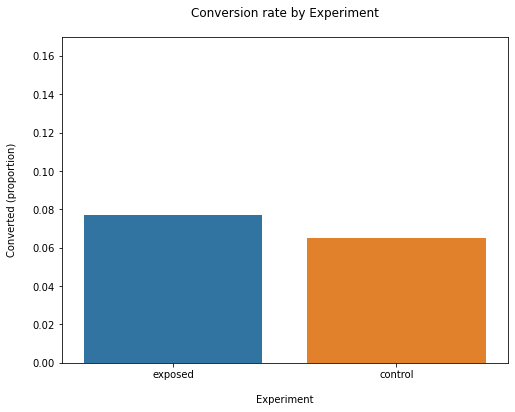

In [44]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['yes'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by Experiment', pad=20)
plt.xlabel('Experiment', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

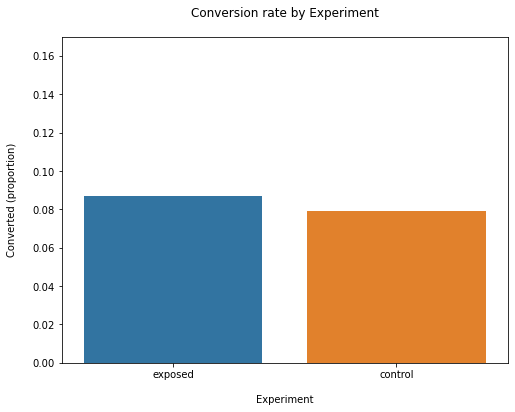

In [45]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['no'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by Experiment', pad=20)
plt.xlabel('Experiment', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

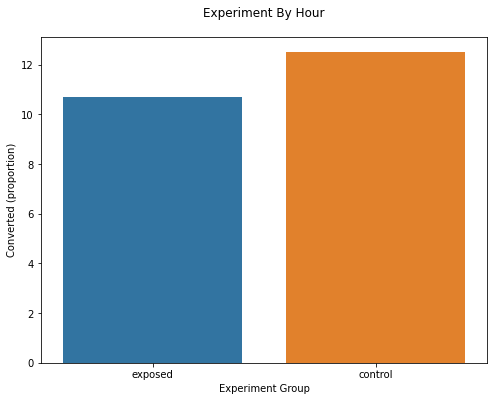

In [46]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['hour'], ci=False)

plt.title('Experiment By Hour', pad=20)
plt.xlabel('Experiment Group')
plt.ylabel('Converted (proportion)');

In [47]:
def date_to_day(dataframe):
    
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['day of week'] = dataframe['date'].dt.day_name()

In [49]:
date_to_day(df)

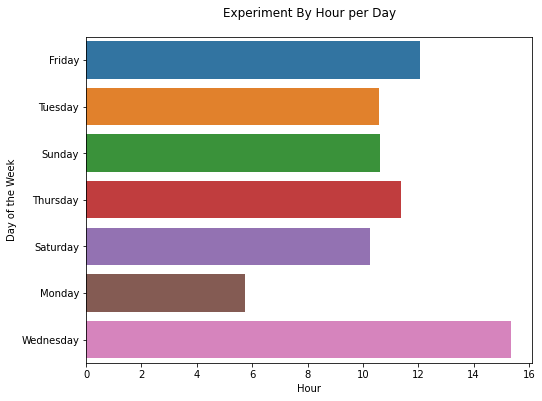

In [50]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['hour'], y=df['day of week'], ci=False)

plt.title('Experiment By Hour per Day', pad=20)
plt.xlabel('Hour')
plt.ylabel('Day of the Week');

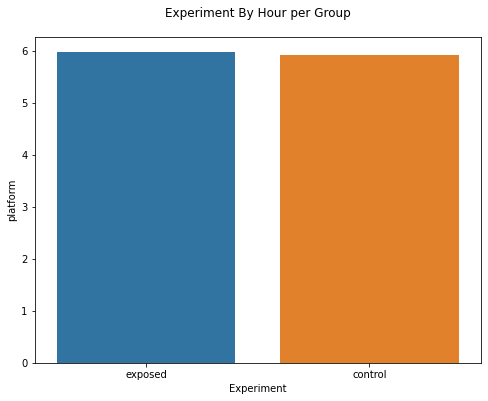

In [51]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['platform_os'], ci=False)

plt.title('Experiment By Hour per Group', pad=20)
plt.xlabel('Experiment')
plt.ylabel('platform');

In [52]:
len(df['device_make'].unique().tolist())

270

In [53]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [87]:
def users_yes(dataframe):
    '''Extract all the users with yes and pass it 
    into another columns'''
    df_yes = df[df['yes'] == 1]
    df_yes = df_yes.drop('no', axis = 1)
    df_yes = df_yes.rename(columns={"yes": "brand_awareness"})
    
    return df_yes

In [88]:
users_yes(df)

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,Saturday
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,Wednesday
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,Friday
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,Thursday
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,Sunday
...,...,...,...,...,...,...,...,...,...
8031,fe42a3c3-3e1e-40c9-b029-6b0ee9702aaa,control,2020-07-10,1,Generic Smartphone,6,Chrome Mobile,1,Friday
8042,fee7da61-84fe-451b-95f4-ba2523fa987d,exposed,2020-07-09,14,Generic Smartphone,6,Chrome Mobile,1,Thursday
8054,ff82e341-b72c-4531-b87e-1e11dc35d3fc,exposed,2020-07-10,8,Samsung SM-G973F,6,Samsung Internet,1,Friday
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,Sunday


In [93]:
def users_no(dataframe):
    df_no = df[df['no'] == 1]
    df_no = df_no.drop('yes', axis = 1)
    da = {1 : 0}
    df_no = df_no.replace({'no':da})
    df_no = df_no.rename(columns={"no": "brand_awareness"})

In [95]:
users_no(df)

In [97]:
df_yes

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,Saturday
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,Wednesday
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,Friday
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,Thursday
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,Sunday
...,...,...,...,...,...,...,...,...,...
8031,fe42a3c3-3e1e-40c9-b029-6b0ee9702aaa,control,2020-07-10,1,Generic Smartphone,6,Chrome Mobile,1,Friday
8042,fee7da61-84fe-451b-95f4-ba2523fa987d,exposed,2020-07-09,14,Generic Smartphone,6,Chrome Mobile,1,Thursday
8054,ff82e341-b72c-4531-b87e-1e11dc35d3fc,exposed,2020-07-10,8,Samsung SM-G973F,6,Samsung Internet,1,Friday
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,Sunday


In [98]:
df_clean = pd.concat([df_yes, df_no], axis = 0)

In [99]:
df_clean

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,Saturday
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,Wednesday
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,Friday
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,Thursday
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,Sunday
...,...,...,...,...,...,...,...,...,...
8016,fd86fc6b-3420-4f81-9df0-98fa1f15abf5,exposed,2020-07-08,17,Samsung SM-G965F,6,Facebook,0,Wednesday
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,Thursday
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,Thursday
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,Friday


In [100]:
df_clean = df_clean.sample(frac=1).reset_index(drop=True)

In [101]:
ab_summary = df_clean.pivot_table(values='brand_awareness', index='experiment', aggfunc=np.sum)
# add additional columns to the pivot table
ab_summary['total'] = df_clean.pivot_table(values='brand_awareness', index='experiment', aggfunc=lambda x: len(x))
ab_summary['rate'] = df_clean.pivot_table(values='brand_awareness', index='experiment')

In [102]:
ab_summary

,brand_awareness,total,rate
experiment,,,
control,264,586,0.450512
exposed,308,657,0.468798


The difference between the awareness for the two groups is 0.01, which is not so bad, given that a very small percentage of the population responded to the questionnaire

In [106]:
#Show the % split between users who know the brand with dummy ad and creative ad
#Calculate pooled probability
mask = (df_clean["experiment"] == "control")
awareness_control = df_clean["brand_awareness"][mask].sum()
total_users_control = df_clean["brand_awareness"][mask].count()

mask = (df["experiment"] == "exposed")
awareness_exposed = df_clean["brand_awareness"][mask].sum()
total_users_exposed = df_clean["brand_awareness"][mask].count()

print("Split of control users who know the brand vs exposed users who know the brand: ", 
          round(total_users_control / df_clean["brand_awareness"].count() * 100, 2), "% ",
          round((total_users_exposed / df_clean["brand_awareness"].count()) * 100, 2), "%")

#count number of users who know the brand in each group
print("Number of control users who know the brand: ", awareness_control)
print("Percentage of control users who know the brand: ", round((awareness_control / total_users_control) * 100, 2), "%")

mask = (df_clean["experiment"] == "control")
print("Number of exposed users who know the brand with the creative ad: ", awareness_exposed)
print("Percentage of exposed users who know the brand with the creative ad: ", round((awareness_exposed/ total_users_exposed) * 100, 2), "%")

Split of control users who know the brand vs exposed users who know the brand:  47.14 %  49.16 %
Number of control users who know the brand:  264
Percentage of control users who know the brand:  45.05 %
Number of exposed users who know the brand with the creative ad:  280
Percentage of exposed users who know the brand with the creative ad:  45.83 %


In [65]:
'''
A_converted = ab_summary.converted[0]
A_total = ab_summary.total[0]
A_cr = ab_summary.rate[0]
B_cr = ab_summary.rate[0]
'''

control_aware = ab_summary.brand_awareness[0] #A_converted
control_total = ab_summary.total[0] #A_total

control_rate = ab_summary.rate[0]
exposed_rate = ab_summary.rate[1]

exposed_aware = ab_summary.brand_awareness[1] #B_converted
exposed_total = ab_summary.total[1] #B_total

Text(0, 0.5, 'probability')

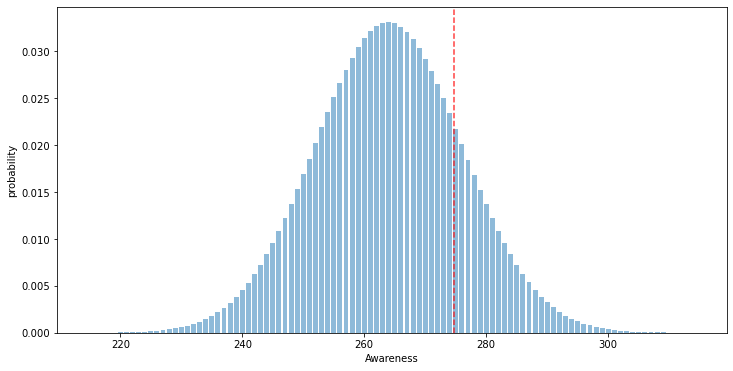

In [80]:
import scipy.stats as scs

fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(control_aware-49, control_aware+50, 100)
y = scs.binom(control_total, control_rate).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=exposed_rate * control_total, c='red', alpha=0.75, linestyle='--')
plt.xlabel('Awareness')
plt.ylabel('probability')

The probability

The distribution for the control group is shown in red and the result from the exposed group is indicated by the red dashed line.It indicates that the probability of getting the result from the control group is somehow high.

Text(0, 0.5, 'probability')

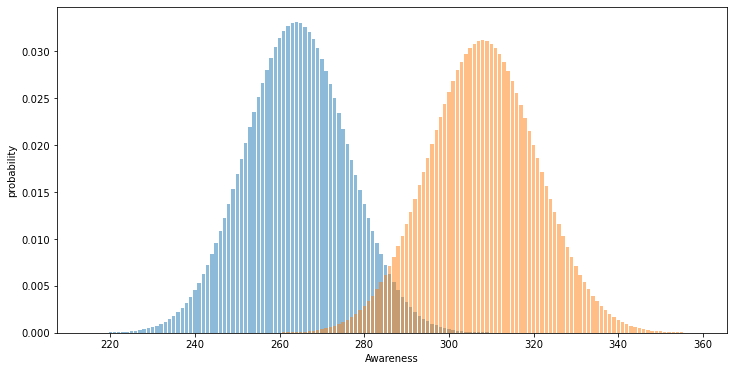

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(control_aware-49, control_aware+50, 100)
yA = scs.binom(control_total, control_rate).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
xB = np.linspace(exposed_aware-49, exposed_aware+50, 100)
yB = scs.binom(exposed_total, exposed_rate).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('Awareness')
plt.ylabel('probability')

Their is a slight difference in the rate of awareness between the two groups (control and exposed). Although
the exposed group (orange) seems to be more aware of the brand than the control group

In [150]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control = df_clean[df_clean['experiment'] == 'control']['brand_awareness']
exposed = df_clean[df_clean['experiment'] == 'exposed']['brand_awareness']

In [153]:
num_con = control.count()
num_expo = exposed.count()
successes = [control.sum(), exposed.sum()]
num_obs = [num_con, num_expo]

z_stat, pval = proportions_ztest(successes, nobs=num_obs)
(lower_control, lower_exposed), (upper_control, upper_exposed) = proportion_confint(successes, nobs=num_obs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_control:.3f}, {upper_control:.3f}]')
print(f'ci 95% for exposed group: [{lower_exposed:.3f}, {upper_exposed:.3f}]')

z statistic: -0.65
p-value: 0.518
ci 95% for control group: [0.410, 0.491]
ci 95% for exposed group: [0.431, 0.507]


The p-value is 0.518, which indicates that there is no statistically 
significant difference between the hypothesis

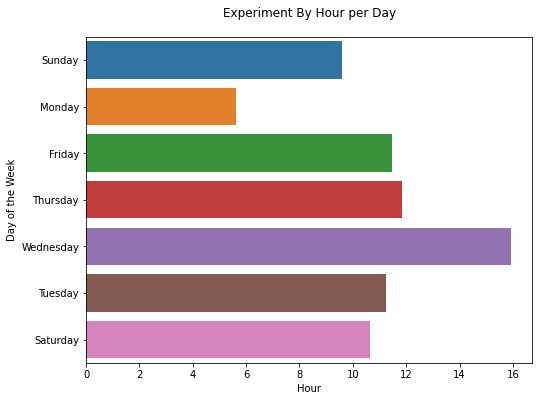

In [76]:
plt.figure(figsize=(8,6))

sns.barplot(x=df_clean['hour'], y=df_clean['day of week'], ci=False)

plt.title('Experiment By Hour per Day', pad=20)
plt.xlabel('Hour')
plt.ylabel('Day of the Week');

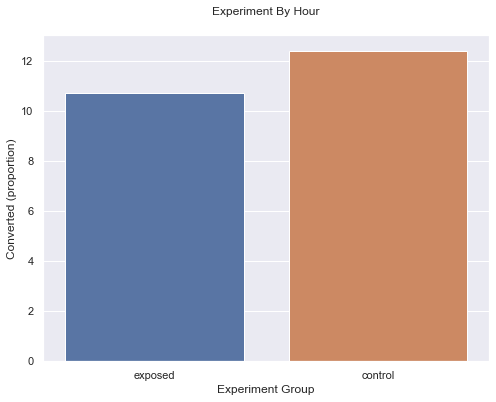

In [404]:
plt.figure(figsize=(8,6))

sns.barplot(x=df_clean['experiment'], y=df_clean['hour'], ci=False)

plt.title('Experiment By Hour', pad=20)
plt.xlabel('Experiment Group')
plt.ylabel('Converted (proportion)');

In [108]:
df_clean.to_csv('AbSmartAdData2.csv')

In [111]:
df_clean['browser'].unique()

array(['Chrome Mobile', 'Chrome Mobile WebView', 'Facebook',
       'Samsung Internet', 'Mobile Safari UI/WKWebView', 'Chrome',
       'Mobile Safari', 'Chrome Mobile iOS'], dtype=object)

In [112]:
df_clean['platform_os'].unique()

array([6, 5], dtype=int64)

In [117]:
df0 = df_clean[df_clean['platform_os'] == 5]

In [121]:
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,day of week
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,Friday
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,Tuesday
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,Sunday
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,Friday
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,Sunday
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,Saturday
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,Sunday


Sequential Testing

In [157]:
class ConditionalSPRT:
    def __init__(self,exposed,control,odd_ratio,alpha=0.05,beta=0.10,stop=None):
        self.exposed = exposed
        self.control = control
        self.alpha = alpha
        self.beta = beta
        self.odd_ratio = odd_ratio
        
    def ConditionalSPRT(self, t1 = 0.1):
        if t1<=1:
            printLog('warning',"Odd ratio should exceed 1.")
        if (alpha >0.5) | (beta >0.5):
            printLog('warning',"Unrealistic values of alpha or beta were passed."
                     +" You should have good reason to use large alpha & beta values")
        if stop!=None:
            stop=math.floor(n0)
            
    def comb(n, k):
        return factorial(n) // factorial(k) // factorial(n - k)

In [140]:
df3 = pd.read_csv('../AdSmartABdata.csv', parse_dates=[['date', 'hour']])

In [159]:
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,day of week
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,Friday
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,Tuesday
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,Sunday
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,Friday
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,Sunday
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,Saturday
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,Sunday


In [160]:
df_clean.to_csv('AbSmartAdData2.csv')

In [161]:
df_clean

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
0,07659c1c-f6f0-4a6b-8089-97290c26aeb9,exposed,2020-07-08,6,Generic Smartphone,6,Chrome Mobile,1,Wednesday
1,d71e8e45-9f00-4408-8b87-230c68511556,control,2020-07-07,9,Generic Smartphone,6,Chrome Mobile,1,Tuesday
2,6b21d95b-178f-445a-8810-d7acdac10e5d,exposed,2020-07-03,8,Generic Smartphone,6,Chrome Mobile,0,Friday
3,14485cd5-6904-4d94-890c-7bb0feb6ff30,exposed,2020-07-08,15,Generic Smartphone,6,Chrome Mobile WebView,1,Wednesday
4,205546a3-5b19-4fcc-87a0-cf6177d889af,control,2020-07-08,16,Generic Smartphone,6,Chrome Mobile,1,Wednesday
...,...,...,...,...,...,...,...,...,...
1238,e55dde26-5c01-466e-b381-dc4e97d2836e,control,2020-07-04,14,Generic Smartphone,6,Chrome Mobile,0,Saturday
1239,8f0066f3-00b6-4ad3-98d3-745a80b900fe,exposed,2020-07-07,4,Generic Smartphone,6,Chrome Mobile,0,Tuesday
1240,0f5bfe2f-cd24-497d-9cec-e8f935665bf2,control,2020-07-05,0,Generic Smartphone,6,Chrome Mobile,1,Sunday
1241,6efe4e0c-bfc8-4056-9789-9d74d7eda6ca,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,Friday


In [313]:
df_browser = df_clean.drop('platform_os', axis = 1)
df_platform = df_clean.drop('browser', axis = 1)

In [170]:
df_browser.to_csv('AbSmartV1.csv')
df_platform.to_csv('AbSmartV2.csv')

In [181]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [314]:
df_browser

,auction_id,experiment,date,hour,device_make,browser,brand_awareness,day of week
0,07659c1c-f6f0-4a6b-8089-97290c26aeb9,exposed,2020-07-08,6,Generic Smartphone,Chrome Mobile,1,Wednesday
1,d71e8e45-9f00-4408-8b87-230c68511556,control,2020-07-07,9,Generic Smartphone,Chrome Mobile,1,Tuesday
2,6b21d95b-178f-445a-8810-d7acdac10e5d,exposed,2020-07-03,8,Generic Smartphone,Chrome Mobile,0,Friday
3,14485cd5-6904-4d94-890c-7bb0feb6ff30,exposed,2020-07-08,15,Generic Smartphone,Chrome Mobile WebView,1,Wednesday
4,205546a3-5b19-4fcc-87a0-cf6177d889af,control,2020-07-08,16,Generic Smartphone,Chrome Mobile,1,Wednesday
...,...,...,...,...,...,...,...,...
1238,e55dde26-5c01-466e-b381-dc4e97d2836e,control,2020-07-04,14,Generic Smartphone,Chrome Mobile,0,Saturday
1239,8f0066f3-00b6-4ad3-98d3-745a80b900fe,exposed,2020-07-07,4,Generic Smartphone,Chrome Mobile,0,Tuesday
1240,0f5bfe2f-cd24-497d-9cec-e8f935665bf2,control,2020-07-05,0,Generic Smartphone,Chrome Mobile,1,Sunday
1241,6efe4e0c-bfc8-4056-9789-9d74d7eda6ca,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,0,Friday


In [329]:
experiment = {'exposed':1, 'control':0}
df_browser = df_browser.replace({'experiment':experiment})

df_v1 = df_browser.drop(['device_make', 'day of week'], axis = 1)

In [330]:
df_v1

,auction_id,experiment,date,hour,browser,brand_awareness
0,07659c1c-f6f0-4a6b-8089-97290c26aeb9,1,2020-07-08,6,Chrome Mobile,1
1,d71e8e45-9f00-4408-8b87-230c68511556,0,2020-07-07,9,Chrome Mobile,1
2,6b21d95b-178f-445a-8810-d7acdac10e5d,1,2020-07-03,8,Chrome Mobile,0
3,14485cd5-6904-4d94-890c-7bb0feb6ff30,1,2020-07-08,15,Chrome Mobile WebView,1
4,205546a3-5b19-4fcc-87a0-cf6177d889af,0,2020-07-08,16,Chrome Mobile,1
...,...,...,...,...,...,...
1238,e55dde26-5c01-466e-b381-dc4e97d2836e,0,2020-07-04,14,Chrome Mobile,0
1239,8f0066f3-00b6-4ad3-98d3-745a80b900fe,1,2020-07-07,4,Chrome Mobile,0
1240,0f5bfe2f-cd24-497d-9cec-e8f935665bf2,0,2020-07-05,0,Chrome Mobile,1
1241,6efe4e0c-bfc8-4056-9789-9d74d7eda6ca,0,2020-07-03,15,Chrome Mobile,0


In [331]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encode = encoder.fit_transform(df_v1[["browser"]])

In [333]:
encoded = encode.toarray()

In [351]:
new_encoded = np.sum(encoded, axis = 1, dtype = int)

,auction_id,experiment,date,hour,device_make,platform_os,brand_awareness,day of week
0,07659c1c-f6f0-4a6b-8089-97290c26aeb9,exposed,2020-07-08,6,Generic Smartphone,6,1,Wednesday
1,d71e8e45-9f00-4408-8b87-230c68511556,control,2020-07-07,9,Generic Smartphone,6,1,Tuesday
2,6b21d95b-178f-445a-8810-d7acdac10e5d,exposed,2020-07-03,8,Generic Smartphone,6,0,Friday
3,14485cd5-6904-4d94-890c-7bb0feb6ff30,exposed,2020-07-08,15,Generic Smartphone,6,1,Wednesday
4,205546a3-5b19-4fcc-87a0-cf6177d889af,control,2020-07-08,16,Generic Smartphone,6,1,Wednesday
...,...,...,...,...,...,...,...,...
1238,e55dde26-5c01-466e-b381-dc4e97d2836e,control,2020-07-04,14,Generic Smartphone,6,0,Saturday
1239,8f0066f3-00b6-4ad3-98d3-745a80b900fe,exposed,2020-07-07,4,Generic Smartphone,6,0,Tuesday
1240,0f5bfe2f-cd24-497d-9cec-e8f935665bf2,control,2020-07-05,0,Generic Smartphone,6,1,Sunday
1241,6efe4e0c-bfc8-4056-9789-9d74d7eda6ca,control,2020-07-03,15,Generic Smartphone,6,0,Friday


In [ ]:
a=np.array([[1,4],[3,5]])  
b=np.sum(a,axis=0)  
b  

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [246]:
columns = encoder.categories_

In [287]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encode = encoder.fit_transform(df_browser[["browser"]])

In [292]:
a = encode.toarray()
b = a.astype(int)

In [299]:
a = np.array(a)

In [ ]:
 total_data = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
    df['Total Data (Bytes)'] = total_data

In [306]:
df_clean.groupby('browser').count() #Chrome Mobile WebView #Chrome Mobile

,auction_id,experiment,date,hour,device_make,platform_os,brand_awareness,day of week
browser,,,,,,,,
Chrome,2,2,2,2,2,2,2,2
Chrome Mobile,695,695,695,695,695,695,695,695
Chrome Mobile WebView,227,227,227,227,227,227,227,227
Chrome Mobile iOS,1,1,1,1,1,1,1,1
Facebook,156,156,156,156,156,156,156,156
Mobile Safari,14,14,14,14,14,14,14,14
Mobile Safari UI/WKWebView,3,3,3,3,3,3,3,3
Samsung Internet,145,145,145,145,145,145,145,145


In [308]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.Collecting mlflow

  Using cached mlflow-1.19.0-py3-none-any.whl (14.4 MB)
  Using cached prometheus_flask_exporter-0.18.2.tar.gz (22 kB)
  Using cached sqlparse-0.4.1-py3-none-any.whl (42 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached alembic-1.4.1.tar.gz (1.1 MB)
  Using cached docker-5.0.0-py2.py3-none-any.whl (146 kB)
  Using cached waitress-2.0.0-py3-none-any.whl (56 kB)
  Using cached databricks-cli-0.14.3.tar.gz (54 kB)
  Using cached Mako-1.1.4-py2.py3-none-any.whl (75 kB)
  Using cached python_editor-1.0.4-py3-none-any.whl (4.9 kB)
  Using cached websocket_client-1.1.0-py2.py3-none-any.whl (68 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.2-py3-none-any.whl size=17400 sha256=60cd414c9f4fe1d6b849bfe96e906202d45e1568dbe2dfc9e39498bad0193e93
  Stored in directory: c:\users\dau

In [311]:
!mlflow --version

mlflow, version 1.19.0mlflow, version 1.19.0



,auction_id,experiment,date,hour,device_make,browser,brand_awareness,day of week,"(Chrome,)","(Chrome Mobile,)","(Chrome Mobile WebView,)","(Chrome Mobile iOS,)","(Facebook,)","(Mobile Safari,)","(Mobile Safari UI/WKWebView,)","(Samsung Internet,)"
0,07659c1c-f6f0-4a6b-8089-97290c26aeb9,exposed,2020-07-08,6,Generic Smartphone,Chrome Mobile,1,Wednesday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,d71e8e45-9f00-4408-8b87-230c68511556,control,2020-07-07,9,Generic Smartphone,Chrome Mobile,1,Tuesday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6b21d95b-178f-445a-8810-d7acdac10e5d,exposed,2020-07-03,8,Generic Smartphone,Chrome Mobile,0,Friday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14485cd5-6904-4d94-890c-7bb0feb6ff30,exposed,2020-07-08,15,Generic Smartphone,Chrome Mobile WebView,1,Wednesday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,205546a3-5b19-4fcc-87a0-cf6177d889af,control,2020-07-08,16,Generic Smartphone,Chrome Mobile,1,Wednesday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,e55dde26-5c01-466e-b381-dc4e97d2836e,control,2020-07-04,14,Generic Smartphone,Chrome Mobile,0,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1239,8f0066f3-00b6-4ad3-98d3-745a80b900fe,exposed,2020-07-07,4,Generic Smartphone,Chrome Mobile,0,Tuesday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1240,0f5bfe2f-cd24-497d-9cec-e8f935665bf2,control,2020-07-05,0,Generic Smartphone,Chrome Mobile,1,Sunday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1241,6efe4e0c-bfc8-4056-9789-9d74d7eda6ca,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,0,Friday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
